In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from pylab import * 
import numpy as np # importando numpy
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import statsmodels.api as sm

from statistics import stdev 
from statistics import mean 


In [236]:
pb_df = pd.read_csv("train.csv")
evaluacion1 = pb_df.iloc[:, 23:32].sum(axis=1)
pb_df.insert(1, "score3", evaluacion1, True) 
evaluacion2 = pb_df.iloc[:, 14:23].sum(axis=1)
pb_df.insert(1, "score2", evaluacion2, True) 
evaluacion3 = pb_df.iloc[:, 5:14].sum(axis=1)
pb_df.insert(1, "score1", evaluacion3, True)

X = pb_df[['score1','score2']]
Y = pb_df['score3']


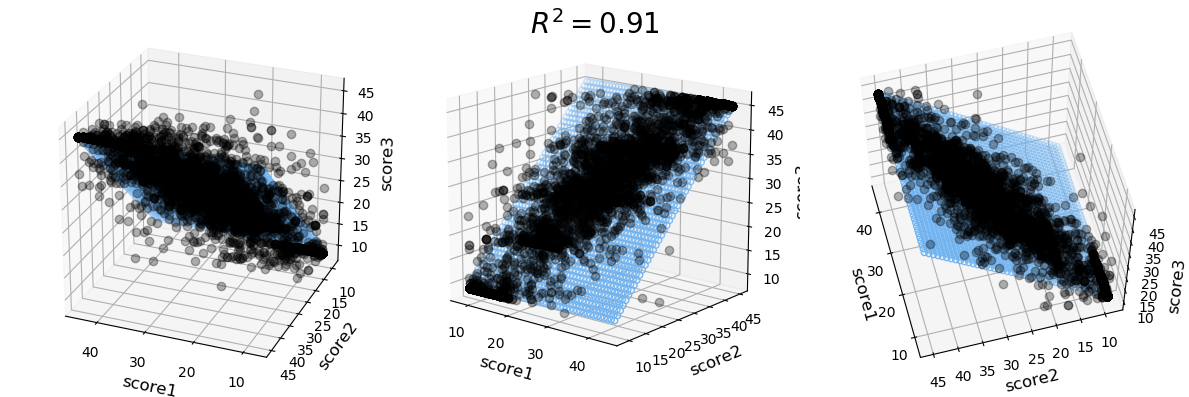

In [237]:
# split en 3 varibles 
x = X['score1']# score1
y = X['score2']# score2
z = Y # score3

x_pred = np.linspace(x.min(), x.max(), 45)  # rangos del score1
y_pred = np.linspace(y.min(), y.max(), 45)  # rangos del score2

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)  # haces el mesh de los datos para la grafica 
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T #unes todos los elementos a predecir en un arreglo

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
# prediction para evaluar en el futuro 
# print(model.predict([[89,90]]))
############################################## Evaluate ############################################

r2 = model.score(X, Y)#r^2 para saber que tan accurate es la prediction 

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

# creas los axes de la grafica 
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:#metes todos los datos 
    ax.plot(x, y, z, color='k', zorder=5, linestyle='none', marker='o', alpha=0.3)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
# **** scatter:
#     eje x = xx_pred.flatten()
#     eje y = yy_pred.flatten()
#     eje z = predicted

    ax.set_xlabel('score1', fontsize=12)
    ax.set_ylabel('score2', fontsize=12)
    ax.set_zlabel('score3', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20) # R^2 del modelo 

fig.tight_layout()

In [238]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x1 = pb_df['score1'] 
x2 = pb_df['score2'] 
x3 = pb_df['score3']
instr= pb_df['instr']
df = pd.DataFrame({"instr": instr,"score1": x1, "score2": x2, "score3": x3})

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['instr','score1', 'score2', 'score3'])

X = scaled_df[['score1','score2']]
y = scaled_df['score3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
score1 = 34
score2 = 43
print ('Predicted Grade for next period: \n', regr.predict([[score1 ,score2]]))

# with statsmodels
X = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()


Intercept: 
 0.023903546676096177
Coefficients: 
 [0.00313199 0.97365374]
Predicted Grade for next period: 
 [41.99750237]


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [239]:
df.set_index('instr', inplace=True)
tGrades = df.loc['1']
x = tGrades['score1']
y = tGrades['score2']
tGrades

,score1,score2,score3
instr,,,
1,25,27,27
1,25,27,27
1,41,45,45
1,25,27,27
1,8,9,9
...,...,...,...
1,27,27,27
1,8,9,9
1,33,36,36


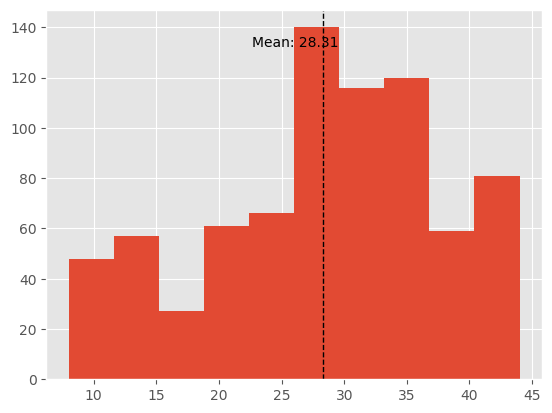

In [205]:
plt.style.use('ggplot')
plt.hist(x, bins=10)
plt.axvline(np.mean(x), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(x)*.8, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(x)))
plt.show()

In [206]:
means = np.mean(x), np.mean(x)
print(means)
stdevs = stdev(x), stdev(y)
dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(100, 2)),columns=['score1', 'score2'])
dist
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

(28.309677419354838, 28.309677419354838)


,score1,score2
min,6.73,-3.42
max,51.27,60.57
mean,28.23,29.78
std,9.46,11.54


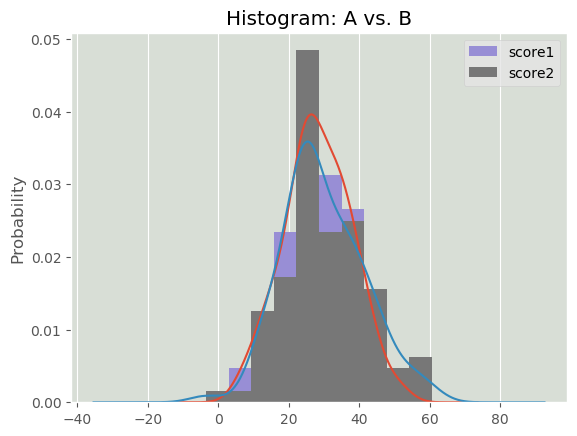

In [207]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8ded6')

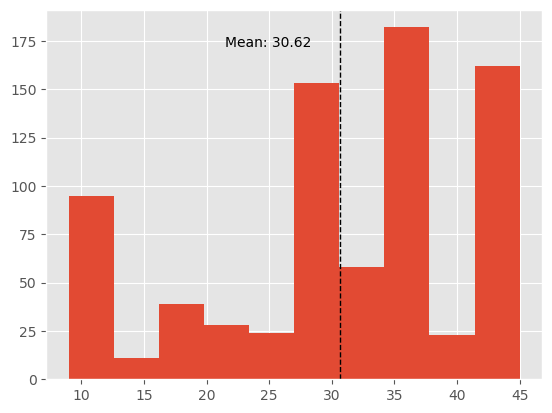

In [211]:
plt.style.use('ggplot')
plt.hist(y, bins=10)
plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(y.mean()*.7, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))
plt.show()
